<a href="https://colab.research.google.com/github/nogbazghi/CSC8980/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nahom Ogbazghi

In [ ]:
import re
filePath = "/content/hw_1-text.txt"
file = open(filePath, 'r')
content = file.read()
print(content)

1. Write a piece of code using a regular expression in Python to count how many times the following name appears: CICERO, this regex needs to be case-sensitive. (10 points)

In [14]:
ciceroPattern = re.compile("CICERO")
findCicero = re.findall(ciceroPattern, content)
print("CICERO appears: ",len(findCicero))

CICERO appears:  7


2. Write a regular expression in Python that finds all 6 character words found in this play.
(10 points)

In [ ]:
sixCharWords = re.compile("[a-zA-Z]{6}")
findSixCharWords = re.findall(sixCharWords, content)
print("6 character words appears: ",len(findSixCharWords))

6 character words appears:  4877


3. Write a piece of code that uses a regular expression in Python to count how many
words are capitalized in the first letter only. (20 points)


In [14]:
firstLetterCap = re.compile("[A-Z][a-z]*\s")
findFirstLetterCap = re.findall(firstLetterCap, content)
print("Words with first letter capitalized appears: ",len(findFirstLetterCap))

['The ', 'Life ', 'Death ', 'Julius ', 'Caesar\n', 'T ', 'I\n', 'E ', 'A ', 'Enter ', 'Commoners\n', 'S\n', 'Is ', 'Being ', 'Upon ', 'Of ', 'First ', 'Commoner\n', 'S\n', 'Where ', 'What ', 'Second ', 'Commoner\n', 'I ', 'S\n', 'But ', 'Second ', 'Commoner\n', 'A ', 'I ', 'I ', 'S\n', 'What ', 'Second ', 'Commoner\n', 'I ', 'I ', 'S\n', 'What ', 'Second ', 'Commoner\n', 'S\n', 'Thou ', 'Second ', 'Commoner\n', 'I ', 'I\n', 'I ', 'I\n', 'As ', 'S\n', 'But ', 'Why ', 'Second ', 'Commoner\n', 'Caesar ', 'S\n', 'Wherefore ', 'What ', 'What ', 'To ', 'You ', 'O ', 'Knew ', 'Many ', 'Have ', 'To ', 'Your ', 'The ', 'To ', 'Pompey ', 'And ', 'Have ', 'That ', 'Tiber ', 'To ', 'Made ', 'And ', 'And ', 'And ', 'That ', 'Be ', 'Run ', 'Pray ', 'That ', 'S\n', 'Assemble ', 'Draw ', 'Tiber ', 'Into ', 'Do ', 'Exeunt ', 'Commoners\n', 'See ', 'They ', 'Go ', 'This ', 'I\n', 'If ', 'S\n', 'May ', 'You ', 'S\n', 'It ', 'Be ', 'And ', 'So ', 'These ', 'Will ', 'Who ', 'And ', 'Exeunt\n', 'E ', 'A ', 

4. Write a regular expression using groups in Python that extracts all phrases that have
“son of ” and extract/output the answer in a case-insensitive way. For example, for the
following “I am the son of earth”, should find “son of earth” and extract/output “earth”.
(20 points)


In [15]:
sonOfPhrases = re.compile("([sS]on\sof\s([a-zA-Z]+))")
findSonOfPhrases = re.findall(sonOfPhrases, content)
print(findSonOfPhrases)

[('son of Rome', 'Rome'), ('son of the', 'the'), ('son of Caesar', 'Caesar'), ('son of our', 'our'), ('son of Marcus', 'Marcus'), ('son of Marcus', 'Marcus')]


5. Plays are divided in acts, write a regular expression using groups in Python that
extracts the number of each act found in this play in a case-sensitive way. (20 points)

In [ ]:
findActs = re.compile("\nACT\s(I*V*X*)")
findAct = re.findall(findActs, content)
print(findAct)

['I', 'II', 'III', 'IV', 'V']


6. Write a Python function that takes the file as an input and outputs how many lines end
with: ? , that is a question mark at the end of the line. This function needs to use a
regular expression. (20 points)

In [16]:
linesEndingQ = re.compile("[a-zA-Z]*\s*\\?\n")
findLinesEndingQ = re.findall(linesEndingQ, content)
print("Number of lines ending with ?: ", len(findLinesEndingQ))

Number of lines ending with ?:  215


7. Using the code from Class 04, train a Random Forest classification model for the same two newsgroups, generate the confusion matrix, and all the same performance metrics.
(50 points)


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
categories = ['rec.autos','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
model = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [8]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

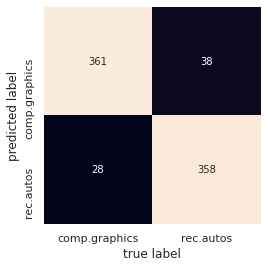

In [9]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [11]:
import sklearn.metrics
print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))


Accuracy: 0.9159235668789809
Precision: 0.927461139896373
Recall: 0.9040404040404041
F1 Score: 0.9159223389201188
Mean Absolute Error: 0.0840764331210191
Mean Squared Error: 0.0840764331210191
Root Mean Squared Error: 0.2899593646030752


Bonus (15 points): Using the code from Class 04. Write a function to find the best
performing model for the TF-IDF vectorization. The requirements for this are: 1) Pass all
metrics for each model in a single dataframe (each row has a metric value, each column
is a model type). 2) Make the decision of the best model by counting which column has
the highest F1-score and accuracy.

In [ ]:
import pandas as pd
import numpy as np

# I collected groups of tf_idf_values per model, each group is (Accuracy, Precision, .... F1 Score, etc) 0:MNB, 1:P, 2:LR
def findBestPerfModel(tf_idf_values):
# I then reordered the pairs into 7 rows: (MNB, P, and LR) - 0: Accuracy, 1: precision, etc. 
  values= []
  for row in range(3):
    row = []
    for col in range(7):
      row.append(tf_idf_values[col][row])
    values.append(row)
  values = [[tf_idf_values[0][0], tf_idf_values[1][0], tf_idf_values[2][0]], [tf_idf_values[0][1], tf_idf_values[1][1], tf_idf_values[2][1]], [tf_idf_values[0][1], tf_idf_values[1][1], tf_idf_values[2][1]], [tf_idf_values[0][1], tf_idf_values[1][1], tf_idf_values[2][1]], [tf_idf_values[0][1], tf_idf_values[1][1], tf_idf_values[2][1]], [tf_idf_values[0][1], tf_idf_values[1][1], tf_idf_values[2][1]], [tf_idf_values[0][1], tf_idf_values[1][1], tf_idf_values[2][1]]]
  # After googling about dataFrame in python I found that pandas and numpy were used so I imported them
  tf_idf_df = pd.DataFrame(np.array(values), columns=["Multinomial Naive Bayes", "Perceptron", "Logistic Regression"], index=["Accuracy", "Precision", "Recall", "F1 Score", "Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error"])
  tf_idf_df.idxmax(axis=1)
  print("Model with max value for Accuracy:")
  print(tf_idf_df.idxmax(axis=1)["Accuracy"])
  print("Model with max value for F1 Score:")
  print(tf_idf_df.idxmax(axis=1)["F1 Score"])
